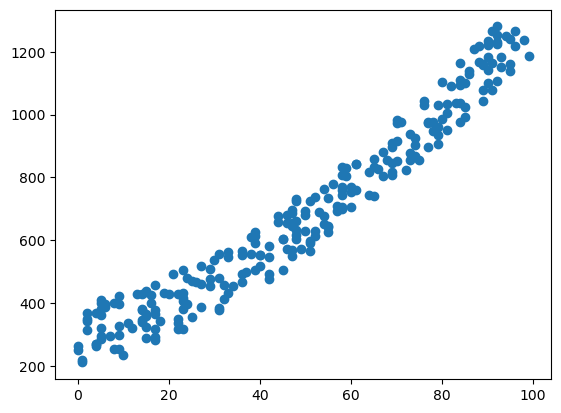

In [12]:
import numpy as np
import matplotlib.pyplot as plt
n=250
X = np.random.randint(0, 100, n)
Y = X**1.5 + np.random.randint(200, 400, n)
plt.scatter(X, Y)
plt.show()

In [13]:
def averageCost(m, q):
    return np.mean(np.sqrt(np.square(Y - q - m*X)))

In [82]:
m, q = 0, 0
alpha = 1
keep = True
gradient_m = np.sum((Y - q - m*X) * X)
gradient_q = np.sum((Y - q - m*X))
costNow = averageCost(m, q)
while keep:
    costThen = averageCost(m+gradient_m*alpha, q+gradient_q*alpha)
    if costThen<costNow:
        keep = False
    else:
        alpha /= 1.25

for _ in range(100000):
    gradient_m = np.sum((Y - q - m*X) * X)
    gradient_q = np.sum((Y - q - m*X))
    m += gradient_m*alpha
    q += gradient_q*alpha    
norm = np.sqrt((gradient_m**2)+(gradient_q**2))
print("average cost:", averageCost(m,q))
print("gradient norm:", norm)
print("m:" , m , "q:" , q)
print(alpha)

average cost: 57.87559092767202
gradient norm: 0.0027077379199695007
m: 9.957209913546343 q: 202.38573105732925
2.3945242826029522e-06


In [83]:
m, q = 0, 0
alpha = 1
for _ in range(100000):
    gradient_m = np.sum((Y - q - m*X) * X)
    gradient_q = np.sum((Y - q - m*X))
    costNow = averageCost(m, q)
    costThen = averageCost(m+gradient_m*alpha, q+gradient_q*alpha)
    while costThen>costNow:
        alpha /= 2
        costThen = averageCost(m+gradient_m*alpha, q+gradient_q*alpha)
    m += gradient_m*alpha
    q += gradient_q*alpha
    alpha *= 2 
norm = np.sqrt((gradient_m**2)+(gradient_q**2))
print("average cost:", averageCost(m,q))
print("gradient norm:", norm)
print("m:" , m , "q:" , q)

average cost: 93.68425859838334
gradient norm: 37272.81673889516
m: 13.006134046659902 q: 0.3641046820863494
1.6940658945086007e-21


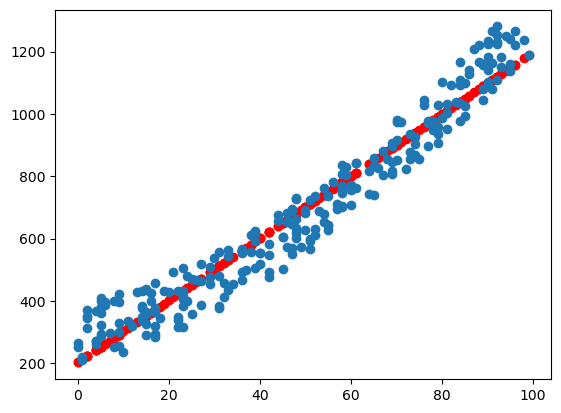

In [79]:
plt.scatter(X, m * X + q, color="red")
plt.scatter(X, Y)
plt.show()